<font color='orange'>**Please create your own copy before starting modification**</font>

Dependencies: Add Your dependencies here



In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load the data

In [61]:
df=pd.read_csv("train.csv")
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


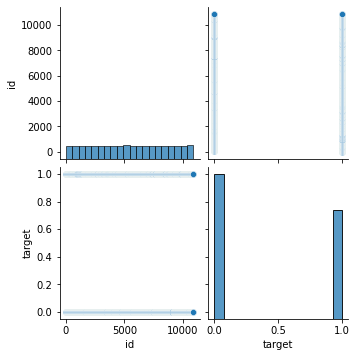

In [62]:
sns.pairplot(df)

Plot the count for each target

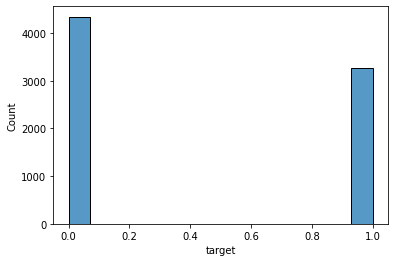

In [63]:
sns.histplot(df.iloc[:,-1])

Print the unique keywords

In [64]:
df2=df.copy()
df2.iloc[:,1]=df2.iloc[:,1].replace(np.nan,"")
uq,uq1=np.unique(df2.iloc[:,1],return_counts=True)
uq

array(['', 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'dera

Plot the count of each keyword

222


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


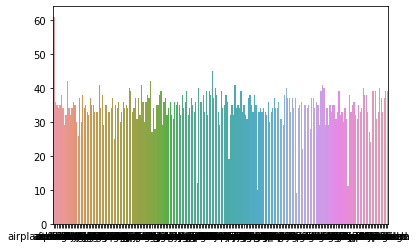

In [65]:
print(len(uq))
sns.barplot(uq,uq1)

Is there any correlation of the length of a tweet with its target. Try to visualize

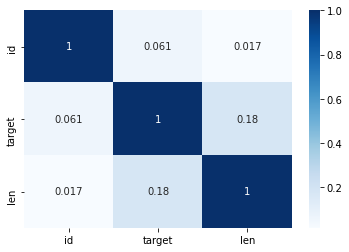

In [66]:
df["len"]=[len(i) for i in df.text]
df
sns.heatmap(df.corr(),cmap="Blues",annot=True)
plt.show()

Print the number of null values in each column

In [67]:
print(df.isnull().sum(axis=0))

id             0
keyword       61
location    2533
text           0
target         0
len            0
dtype: int64


Remove the null values

In [68]:
df=df.dropna(axis=0)
df=df.reset_index(drop=True)
#df["len"]=[len(i) for i in df.text]
df

,id,keyword,location,text,target,len
0,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55
1,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67
2,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82
3,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34
4,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76
...,...,...,...,...,...,...
5075,10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0,51
5076,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0,107
5077,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0,107
5078,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0,93


Remove:


1.   Double Spaces
2.   Hypens and arrows
3.   Emojis
4.   URL
5.   Any other non english or special symbol

Replace wrong spellings with correct spellings



In [69]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
import re


In [70]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

c=[]
for i in (df.text):
    temp = re.sub(r'((http|https)://|www.).+?(\s|$)',' ',i)
    temp=remove_urls(temp)
    temp=remove_html(temp)
    temp=remove_emoji(temp)
    temp=remove_punctuation(temp)
    temp = re.sub(r'[^a-z0-9A-Z\s]+',' ',temp)
    temp = re.sub(r'(\n)+',' ',temp)#new line remover
    temp = re.sub(r'\s{2,}',' ',temp)#multi space rempver
    temp.strip()
    temp=temp.lower()
    
    c.append(temp)
    #print(i)

    


In [71]:
!pip install pyspellchecker

In [59]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
for i in range(len(c)):
  c[i]=correct_spellings(c[i])


In [72]:
df["refined_word"]=c
df.head()
for i in c:
    print(i)




Streaming output truncated to the last 5000 lines.
people who say it cannot be done should not interrupt those who are doing it george bernard shaw
the first man gets the oyster the second man gets the shell andrew carnegie
experts in france begin examining airplane debris found on reunion island french air accident experts o news
strict liability in the context of an airplane accident pilot error is a common component of most aviation cr 
crobscarla your lifetime odds of dying from an airplane accident are 1 in 8015
experts in france begin examining airplane debris found on reunion island french air accident experts on wedn 
family members of osama bin laden have died in an airplane accident how ironic mhmmm gov shit i suspect
man goes into airplane engine accident via youtube
horrible accident man died in wings of airplane 29072015 
a cessna airplane accident in ocampo coahuila mexico on july 29 2015 killed four men including a state of coahuila government official
horrible accident 

In [73]:
!pip install wordcloud

Plot a word cloud of real target and fake target

In [74]:
from wordcloud import WordCloud, STOPWORDS


In [75]:
nltk.download("stopwords")
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["refined_word"] = df["refined_word"].apply(lambda text: remove_stopwords(text))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,keyword,location,text,target,len,refined_word
0,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55,bbcmtd wholesale markets ablaze
1,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67,always try bring heavy metal rt
2,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82,africanbaze breaking newsnigeria flag set abla...
3,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34,crying set ablaze
4,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76,plus side look sky last night ablaze


Keep only text and target column in the dataset

In [76]:
df.head()
df2=df.loc[:,["refined_word","target"]]
df2

,refined_word,target
0,bbcmtd wholesale markets ablaze,1
1,always try bring heavy metal rt,0
2,africanbaze breaking newsnigeria flag set abla...,1
3,crying set ablaze,0
4,plus side look sky last night ablaze,0
...,...,...
5075,bright side wrecked,0
5076,widda16 hes gone relax thought wife wrecked ca...,0
5077,three days work theyve pretty much wrecked hah...,0
5078,fx forex trading cramer igers 3 words wrecked ...,0


Split data into train and validation

In [77]:
x_train= df2.iloc[0:5000,:]
x_test= df2.iloc[5000:,:]
print(len(x_train),len(x_test))
x_train1=x_train.iloc[:,0]
y_train1=x_train.iloc[:,1]
x_test1=x_test.iloc[:,0]
y_test1=x_test.iloc[:,1]
x_train

5000 80


,refined_word,target
0,bbcmtd wholesale markets ablaze,1
1,always try bring heavy metal rt,0
2,africanbaze breaking newsnigeria flag set abla...,1
3,crying set ablaze,0
4,plus side look sky last night ablaze,0
...,...,...
4995,court back session testimony continues med exa...,0
4996,icymagistrate upper arm friggin icicle project...,1
4997,explosion gaza strip kills four wounds 30 caus...,1
4998,nicolaclements4 sure covering head wounds scab...,0


In [78]:
df.head()
df11=x_train.loc[x_train.target==1,"refined_word"]
df00=x_train.loc[x_train.target==0,"refined_word"]
f1=' '.join(list(df11)).split(' ')
f2=' '.join(list(df00)).split(' ')


Print the count of unique words

In [79]:
from collections import Counter
unq=Counter(list(' '.join(list(x_train.refined_word)).split(' ')))
unq.most_common(10)
total=sum(list(unq.values()))
print(len(unq))
print(total)

13566
47581


Compute the Term-Document Matrix (TDM) for all classes.

Use CountVectorizer of sklearn and print the dataframe with number of columns = number of unique words and the row showing the count of that word in a sentence.

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
cv = v.fit_transform(list(df.refined_word))

In [81]:
cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [82]:
df3 = pd.DataFrame(columns=v.get_feature_names(),data=cv.toarray())
df3.head()


,0011,001116,005225,0104,010401,012032,012624,02,0215,03,0306,030811,034,0400,045,05,05082015,05th,06,0605,061,063424,06jst,07,070,0700,0730,075,080,0800,0802pm,080615,08072015,08315,0913,0936,0day,10,100,1000,...,zakuun,zaman,zamtriossu,zar,zarharzar,zarry,zayn,zaynmaiikist,zeal,zehrs,zenandemcfen,zenit,zeno001,zepp1978,zergele,zero,zhenghxn,zimbabwe,zimmer,zimpapersviews,zionism,zionist,zip,zippoline,zodiac,zojadelin,zomatoaus,zombie,zombiefunrun2014,zombies,zone,zones,zoom,zotar50,zouma,zss,zumiez,zurich,zxathetis,zzzz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Frequency of words in class 0 and 1

Does the sum of the unique words in target 0 and 1 sum upto the total number of unique words in the whole document? Why or why not? Explain in report.

In [83]:
s1 = Counter(f1)
s2 = Counter(f2)
class0_len = len(s2)
class1_len = len(s1)
total_c0 = sum(list(s2.values()))
total_c1 = sum(list(s1.values()))
print("class0 ",class0_len)
print("class1 ",class1_len)
print(class1_len+class0_len)

class0  9308
class1  7206
16514


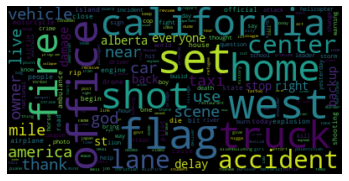

In [84]:
from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(background_color ='black',max_font_size = 50)
wc.generate(' '.join(s1))

plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

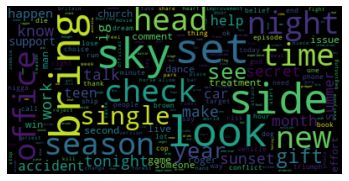

In [85]:
from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(background_color ='black',max_font_size = 50)
wc.generate(' '.join(s2))

plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

Total frequency

In [86]:
print("frequecy of class 1=",total_c0)
print("frequency of class 2=",total_c1)

frequecy of class 1= 26011
frequency of class 2= 21570


Calculate the probability for each word in a given class.

Class 0

In [87]:
each_0=dict(zip(list(s2.keys()),list(np.array(list(s2.values()))/total_c0)))


Class 1

In [88]:
each_1=dict(zip(list(s1.keys()),list(np.array(list(s1.values()))/total_c1)))

We have calculated the probability of occurrence of word in a class, we can now substitute the values in the Baye's equation. 

If a word from the new sentence does not occur in the class within the training set, the equation becomes zero. This problem can be solved using smoothing like Laplace smoothing. 

Probability for class 0

In [89]:
#prob0=(s11.shape[0])/(s11.shape[0]+s22.shape[0])
prob0=(df00.shape[0])/(df11.shape[0]+df00.shape[0])
print("Class 0 probablity",prob0)

Class 0 probablity 0.568


Probability for class 1

In [90]:
#prob0=(s11.shape[0])/(s11.shape[0]+s22.shape[0])
prob1=(df11.shape[0])/(df11.shape[0]+df00.shape[0])
print("Class 1 probablity",prob1)

Class 1 probablity 0.432


Print target class

In [91]:
arr=[]
p0=[]
p1=[]
for i in x_test.refined_word:
  a=i.split(' ')
  # post0=1
  # post1=1
  post0=prob0
  post1=prob1
  for j in a:
    if s2.get(j,-1)==-1:
      #post0*=prob0
      post0*=(1/(total_c0+total))
    else:
      #post0*=prob0
      post0*=each_0.get(j,-1)
    if s1.get(j,-1)==-1:
      #post1*=prob1
      post1*=(1/(total_c1+total))
    else:
      #post1*=prob1
      post1*=each_1.get(j,-1)
  p1.append(post1)
  p0.append(post0)
  if post0>post1:
    arr.append(0)
  else:
    arr.append(1)
x_test["pred"]=arr
print(x_test.head())
print(np.array(x_test.target))
print(np.array(x_test.pred))
    



                                           refined_word  target  pred
5000                           crawling skin wounds hea       1     0
5001  driver rams car israeli soldiers wounds 3 mili...       1     1
5002  says many wounds could fatal rather quickly ot...       0     1
5003  squeaver hangin star buck watchin boy wreck se...       0     1
5004  season 3 new girl emotional train wreck wanted...       0     0
[1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0]
[0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [92]:
from sklearn.metrics import roc_curve,confusion_matrix,accuracy_score,precision_recall_fscore_support,f1_score,auc
print("Accuracy",accuracy_score(np.array(x_test.target),np.array(x_test.pred)))
print(confusion_matrix(x_test.target,x_test.pred))

Accuracy 0.8625
[[36  8]
 [ 3 33]]


Precision:  [0.92307692 0.80487805]
Recall:  [0.81818182 0.91666667]
F1 score:  [0.86746988 0.85714286]


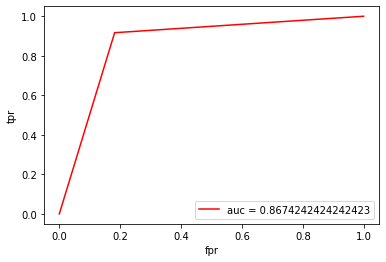

In [93]:
from sklearn import metrics
fpr,tpr,thres = roc_curve(x_test.target,x_test.pred)
plt.plot(fpr,tpr,label=f'auc = {auc(fpr,tpr)}',color='red')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
precision,recall,f1score ,thres= precision_recall_fscore_support(np.array(x_test.target),np.array(x_test.pred))
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 score: ",f1score)

References:

[Ref1](https://sebastianraschka.com/Articles/2014_naive_bayes_1.html)